In [1]:
import os
from importlib import reload
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import math
import datetime
import pdblp
import runpy
import QuantLib as ql
import matplotlib as mpl
#import matplotlib
mpl.get_backend()
import matplotlib.pyplot as plt
plt.interactive(False)
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import minmax_scale
from sklearn.mixture import GaussianMixture
from scipy.stats import zscore
import pickle
import re
import concurrent.futures
import time
from datetime import datetime, timedelta, time
from scipy import stats

In [2]:
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 10000)
pd.options.display.float_format = '{:,}'.format
pd.options.mode.chained_assignment = None

## BBG API
con = pdblp.BCon(debug=False, port=8194, timeout=50000)
con.start()

from Utilities import *
from Conventions import FUT_CT,FUT_CT_Q, ccy, ccy_infl, hist
from OIS_DC_BUILD import ois_dc_build, get_wirp, ois_from_nodes
from SWAP_BUILD import swap_build, libor_from_nodes
from SWAP_PRICER import Swap_Pricer, Swap_curve_fwd, quick_swap
from SWAP_TABLE import swap_table, swap_table2, curve_hmap
from INF_ZC_BUILD import infl_zc_swap_build, Infl_ZC_Pricer, inf_swap_table
from BOND_CURVES import bond_curve_build
from VOL_BUILD import build_vol_surf, build_vol_spline, bond_fut_opt_strat, get_sim_option_px, build_stir_vol_surf, stir_opt_strat
from PLOT import plt_curve, plt_inf_curve, plt_opt_strat, rates_hm, curve_hm, plt_ois_curve, plot_opt_vol_surf, plt_stir_opt_strat, plotool, ecfc_plot


In [126]:
# bokeh imports
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, BoxZoomTool, ResetTool, Legend, DatetimeTickFormatter, SingleIntervalTicker, LinearAxis, FuncTickFormatter
from bokeh.models import ColumnDataSource, TabPanel, Tabs, LabelSet, Span, Range1d, FactorRange, Range, Label, LinearColorMapper
from bokeh.layouts import row, column, gridplot, layout
from bokeh.palettes import Category10, brewer, Category20, Bright6, Blues8, Blues4, Cividis256
from bokeh.transform import factor_cmap
from bokeh.models.renderers import GlyphRenderer
from itertools import accumulate
from bokeh.colors import RGB
from matplotlib import cm

In [4]:
#v1 = build_stir_vol_surf(['SFRM4P 96'], chain_len=[20,20], b=0)
v2 = build_vol_surf(['USH4P 117'], chain_len=[12,12], b=0)

0 USH4P 113.0 Comdty
1 USH4P 113.5 Comdty
2 USH4P 114.0 Comdty
3 USH4P 114.5 Comdty
4 USH4P 115.0 Comdty
5 USH4P 115.5 Comdty
6 USH4P 116.0 Comdty
7 USH4P 116.5 Comdty
8 USH4P 117.0 Comdty
9 USH4P 117.5 Comdty
10 USH4P 118.0 Comdty
11 USH4P 118.5 Comdty
12 USH4P 119.0 Comdty
13 USH4P 119.5 Comdty
14 USH4P 120.0 Comdty
15 USH4P 120.5 Comdty
16 USH4P 121.0 Comdty
17 USH4P 121.5 Comdty
18 USH4C 116.5 Comdty
19 USH4C 117.0 Comdty
20 USH4C 117.5 Comdty
21 USH4C 118.0 Comdty
22 USH4C 118.5 Comdty
23 USH4C 119.0 Comdty
24 USH4C 119.5 Comdty
25 USH4C 120.0 Comdty
26 USH4C 120.5 Comdty
27 USH4C 121.0 Comdty
28 USH4C 121.5 Comdty
29 USH4C 122.0 Comdty
30 USH4C 122.5 Comdty
31 USH4C 123.0 Comdty
32 USH4C 123.5 Comdty
33 USH4C 124.0 Comdty
34 USH4C 124.5 Comdty
35 USH4C 125.0 Comdty
36 USH4C 125.5 Comdty
*** !!! listed_vol surf built !!! ***


In [72]:
v2.fut

'USH4 Comdty'

In [12]:
v2.tab

,ticker,strikes,opt_type,px,px_64,Yld,ATM_K,bs_px,iv,delta,gamma,theta,vega
0,USH4P 113.0 Comdty,113.0,-1,0.0234375,0'01,4.8522009,48.773449999999926,0.023432173780820815,17.764652818178156,-2.0152952170261527,0.015539524824108284,-3.4838162011489753,0.8599648678515578
1,USH4P 113.5 Comdty,113.5,-1,0.0234375,0'01,4.8117491999999995,44.72827999999991,0.02343456424784946,16.513617384023327,-2.151565140313758,0.01766885168734106,-3.4228986233440293,0.9089433019476555
2,USH4P 114.0 Comdty,114.0,-1,0.0234375,0'01,4.7715218,40.70554,0.02345543438734075,15.257553097671654,-2.310808967097238,0.020310691559973778,-3.3588655079513297,0.9653745634805355
3,USH4P 114.5 Comdty,114.5,-1,0.03125,0'02,4.7315161,36.70496999999999,0.03128058288614855,14.684353154994831,-3.080741182066164,0.026831699923379318,-4.1099967940616,1.227408875541678
4,USH4P 115.0 Comdty,115.0,-1,0.0390625,0'02,4.69173,32.72635999999993,0.039062664301719785,13.914120745756781,-3.921936017547382,0.03452400043462796,-4.747905775810169,1.496453173854636
5,USH4P 115.5 Comdty,115.5,-1,0.0546875,0'03,4.6521611,28.76946999999994,0.05468535915904161,13.416125290977737,-5.413924357344854,0.046384718935135634,-5.930286431577803,1.9386003430999112
6,USH4P 116.0 Comdty,116.0,-1,0.0859375,0'05,4.6128072,24.834079999999936,0.08588920194748118,13.269778537913062,-8.021319352285314,0.06358516621131635,-7.952309839532749,2.6284864118325553
7,USH4P 116.5 Comdty,116.5,-1,0.125,0'08,4.573666,20.919959999999982,0.12500069712226447,12.927214812080907,-11.206388782678532,0.08348908919782998,-9.908500999725051,3.3621798364765385
8,USH4P 117.0 Comdty,117.0,-1,0.1796875,0'11,4.5347354,17.026899999999934,0.17978839220290524,12.574137614821757,-15.40484727427607,0.10689110085021691,-12.000842966711872,4.1870293901799664
9,USH4P 117.5 Comdty,117.5,-1,0.265625,0'17,4.4960132,13.154679999999974,0.26561541975162006,12.41172239281169,-21.175987169398958,0.13214060528951396,-14.452264560779648,5.109219907229104


In [83]:
opt_w = [1]

In [84]:
ticker_list = [v2.fut]+ v2.tab.loc[[6]]['ticker'].tolist()
st_date = '20230801'

ticker_list

['USH4 Comdty', 'USH4P 115.5 Comdty']

In [92]:
df1 = con.bdh(ticker_list , 'PX_LAST', st_date, datetime.datetime.now().strftime('%Y%m%d'))
df1.dropna(inplace=True)
px_series = np.round(100*np.sum([ np.array(df1.iloc[:,i+1])*opt_w[i] for i in np.arange(len(opt_w)) ], axis=0),1)

df1

ticker,USH4 Comdty,USH4P 115.5 Comdty
field,PX_LAST,PX_LAST
date,,
2024-01-29,120.53125,0.1875
2024-01-30,121.25,0.109375
2024-01-31,122.34375,0.0625
2024-02-01,124.03125,0.046875
2024-02-02,121.90625,0.078125
2024-02-05,120.125,0.140625
2024-02-06,121.0,0.078125
2024-02-07,120.84375,0.0625


In [67]:
s1 = figure(width=550, height=400,tools=["pan", "crosshair", "wheel_zoom", "box_zoom", "save", "reset", "help"], toolbar_location='right')
s1.xaxis.formatter=DatetimeTickFormatter(days="%d-%b-%y", months="%d-%b-%y")
s1.add_tools(HoverTool(tooltips=[('date', '$x{%d.%b.%y}'), ('y', '$y{0.0}')], formatters={'$x': 'datetime'}))
s1.xgrid.visible = False
s1.ygrid.visible = False
s1.line(x=df1.index , y=px_series , width=0.7, color='royalblue', legend_label="strat")
s1.legend.location = 'bottom_right'
s1.legend.label_text_font = "calibri"
s1.legend.label_text_font_size = "9pt"
s1.legend.spacing = 1
s1.legend.click_policy = "mute"
s1.legend.background_fill_alpha = 0.0
s1.yaxis.axis_label = 'px (bps)'
s1.xaxis.axis_label = 'date'

s2 = figure(width=550, height=400,tools=["pan", "crosshair", "wheel_zoom", "box_zoom", "save", "reset", "help"], toolbar_location='right')
s2.xaxis.formatter=DatetimeTickFormatter(days="%d-%b-%y", months="%d-%b-%y")
s2.add_tools(HoverTool(tooltips=[('date', '$x{%d.%b.%y}'), ('y', '$y{0.0}')], formatters={'$x': 'datetime'}))
s2.xgrid.visible = False
s2.ygrid.visible = False
s2.line(x=df1.index , y=df1.iloc[:,0] , width=0.7, color='royalblue', legend_label="fut")
s2.legend.location = 'bottom_right'
s2.legend.label_text_font = "calibri"
s2.legend.label_text_font_size = "9pt"
s2.legend.spacing = 1
s2.legend.click_policy = "mute"
s2.legend.background_fill_alpha = 0.0
s2.yaxis.axis_label = 'px (bps)'
s2.xaxis.axis_label = 'date'

s_plot = []
s_plot.append(s1)
s_plot.append(s2)
layout = column(*s_plot)
show(layout)




In [93]:
s1 = figure(width=550, height=400,tools=["pan", "crosshair", "wheel_zoom", "box_zoom", "save", "reset", "help"], toolbar_location='right')
s1.xaxis.formatter=DatetimeTickFormatter(days="%d-%b-%y", months="%d-%b-%y")
s1.add_tools(HoverTool(tooltips=[('date', '$x{%d.%b.%y}'), ('y', '$y{0.0}')], formatters={'$x': 'datetime'}))
s1.xgrid.visible = False
s1.ygrid.visible = False
s1.line(x=df1.index , y=px_series , width=0.7, color='navy', legend_label="strat", alpha=1.0)
s1.legend.location = 'top_right'
s1.legend.label_text_font = "calibri"
s1.legend.label_text_font_size = "9pt"
s1.legend.spacing = 1
s1.legend.click_policy = "mute"
s1.legend.background_fill_alpha = 0.0
s1.yaxis.axis_label = 'px (bps)'
s1.xaxis.axis_label = 'date'

s1.y_range = Range1d(min(px_series)-2, max(px_series)+2)
# SECOND AXIS
s1.extra_y_ranges = {"y2_range": Range1d( start=min(df1.iloc[:,0])-0.05, end=max(df1.iloc[:,0])+0.05)}
s1.add_layout(LinearAxis(y_range_name="y2_range"), "right")
s1.line(x=df1.index , y=df1.iloc[:,0] , width=0.7, color='green', legend_label="fut", alpha=0.2, y_range_name = 'y2_range')

show(s1)

In [70]:
df1.index

DatetimeIndex(['2023-09-20', '2023-09-21', '2023-09-22', '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29', '2023-10-02', '2023-10-03',
               ...
               '2024-02-02', '2024-02-05', '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15'], dtype='datetime64[ns]', name='date', length=103, freq=None)

In [91]:
min(px_series)-2

nan

In [5]:
v2 = build_stir_vol_surf(['SFRM4P 96'], chain_len=[20,20], b=0)


SFRM4P 93.75 Comdty
SFRM4P 93.8125 Comdty
SFRM4P 93.875 Comdty
SFRM4P 93.9375 Comdty
SFRM4P 94.0 Comdty
SFRM4P 94.0625 Comdty
SFRM4P 94.125 Comdty
SFRM4P 94.1875 Comdty
SFRM4P 94.25 Comdty
SFRM4P 94.3125 Comdty
SFRM4P 94.375 Comdty
SFRM4P 94.4375 Comdty
SFRM4P 94.5 Comdty
SFRM4P 94.5625 Comdty
SFRM4P 94.625 Comdty
SFRM4P 94.6875 Comdty
SFRM4P 94.75 Comdty
SFRM4P 94.8125 Comdty
SFRM4P 94.875 Comdty
SFRM4P 94.9375 Comdty
SFRM4P 95.0 Comdty
SFRM4P 95.0625 Comdty
SFRM4P 95.125 Comdty
SFRM4P 95.1875 Comdty
SFRM4P 95.25 Comdty
SFRM4P 95.3125 Comdty
SFRM4P 95.375 Comdty
SFRM4P 95.4375 Comdty
SFRM4P 95.5 Comdty
SFRM4P 95.5625 Comdty
SFRM4P 95.625 Comdty
SFRM4C 94.375 Comdty
SFRM4C 94.4375 Comdty
SFRM4C 94.5 Comdty
SFRM4C 94.5625 Comdty
SFRM4C 94.625 Comdty
SFRM4C 94.6875 Comdty
SFRM4C 94.75 Comdty
SFRM4C 94.8125 Comdty
SFRM4C 94.875 Comdty
SFRM4C 94.9375 Comdty
SFRM4C 95.0 Comdty
SFRM4C 95.0625 Comdty
SFRM4C 95.125 Comdty
SFRM4C 95.1875 Comdty
SFRM4C 95.25 Comdty
SFRM4C 95.3125 Comdty
SFRM4C 9

In [6]:
st = stir_opt_strat(['SFRM4'], ['C', 'C'], [95.125, 95.375], [1, -1], s_range=[-0.25, 0.25], increm=0.0625, built_surf=v2)

94.875
94.9375
95.0
95.0625
95.125
95.1875
95.25
95.3125
95.375
95.4375
95.5
95.5625


In [9]:
#    v2 = build_vol_surf(['RXJ4P 133'], chain_len=[12,12], b=0)
#    st = bond_fut_opt_strat(['RXJ4'], ['C', 'C'], [135, 136.5], [1, -1], s_range=[-1, 1], increm=0.5, built_surf=v2)
add_delta = [0]
payoff_increm_calc = 100


spot_idx = st.strat.loc[st.strat['ATM_K'] == 0].index[0]
if st.currency == 'USD1':
    px_label = px_dec_to_opt_frac(st.strat_px)
else:
    px_label = str(np.round(st.strat_px, 3))

x_spot = st.strat['fut_px'][spot_idx]
#### payoff at expiry
x1 = np.linspace(min(st.strat['fut_px']), max(st.strat['fut_px']), num=payoff_increm_calc)
if len(add_delta) > 1:
    d_payoff1 = fut_payoff(x1, [st.fut], add_delta)
    y1 = opt_payoff(x1, st.opt_dets, st.strat_px) + d_payoff1
    y1_fmt = [convert_to_64(px_dec_to_opt_frac(y1[i])) for i in np.arange(len(y1))]
    st.strat['strat_delta'] = st.strat['strat_delta'] + 100*np.array(add_delta[0])   #### needs testing
else:
    y1 = opt_payoff(x1, st.opt_dets, st.strat_px)
    y1_fmt = [convert_to_64(px_dec_to_opt_frac(y1[i])) for i in np.arange(len(y1))]

p1 = figure(width=700, height=350, tools=["pan", "crosshair", "wheel_zoom", "box_zoom", "save", "reset", "help"],toolbar_location='right')
main_source = ColumnDataSource(data={'x2': st.strat['fut_px'],
                                     'y2': st.strat['strat_px'],
#                                     'y3': [convert_to_64(st.strat['strat_px_fmt'][i]) for i in np.arange(len(st.strat))],
                                     'k_dist': st.strat['ATM_K'],
                                     'y2_fmt': st.strat['strat_px_fmt'] })
p1.add_tools(HoverTool(tooltips=[('fut', '$x{0.00}'), ('px', '@y2{0.00}'), ('px_fmt', '@y2_fmt'), ('y_dist', '@k_dist{0.0}')]))
p1.xgrid.visible = False
p1.ygrid.visible = False
if st.currency == 'USD1':
    p1.line(x=x1, y=y1_fmt, width=0.7, color='black', alpha=1.0, muted_alpha=0.1, legend_label="@expiry")
    p1.line(x='x2', y='y3', width=0.7, color='navy', alpha=1.0, muted_alpha=0.1, legend_label="opt_px: "+px_label, source=main_source, name = 'payoff')
    p1.yaxis.axis_label = 'strat_px (64th)'
else:
    p1.line(x=x1, y=y1, width=0.7, color='black', alpha=1.0, muted_alpha=0.1, legend_label="@expiry")
    p1.line(x='x2', y='y2', width=0.7, color='navy', alpha=1.0, muted_alpha=0.1, legend_label="opt_px: "+px_label, source=main_source)
    p1.yaxis.axis_label = 'strat_px'
live_line = Span(location=x_spot, dimension='height', line_color='goldenrod', line_width=1)
zero_line = Span(location=0, dimension='width', line_color='darkseagreen', line_width=1)
p1.add_layout(live_line)
p1.add_layout(zero_line)
p1_source = ColumnDataSource(data=dict(x=np.round(st.strat['fut_px'][::int(len(st.strat) / 6)], 1).tolist(),z=np.round(st.strat['ATM_K'][::int(len(st.strat) / 6)], 1).tolist()))
labels_yld = LabelSet(x='x', y=5, y_units='screen', text='z', source=p1_source, text_font='calibri', text_color='firebrick', text_font_size='9px', text_align='center', x_offset=0)
p1.add_layout(labels_yld)
p1.xaxis.ticker = np.round(st.strat['fut_px'][::int(len(st.strat) / 6)], 2)
p1.legend.location = 'top_left'
p1.legend.label_text_font = "calibri"
p1.legend.label_text_font_size = "9pt"
p1.legend.spacing = 1
p1.legend.click_policy = "mute"
p1.legend.background_fill_alpha = 0.0

p2_source = ColumnDataSource(data=dict(x=np.round(st.strat['fut_px'][::int(len(st.strat) / 6)], 1).tolist(), z=np.round(0.01 * st.strat['strat_delta'][::int(len(st.strat) / 6)],2).tolist()))
p2 = figure(width=700, height=225, tools=["pan", "crosshair", "wheel_zoom", "box_zoom", "save", "reset", "help"], toolbar_location='right')
p2.add_tools(HoverTool(tooltips=[('x', '$x{0.00}'), ('y', '$y{0.00}')]))
p2.xgrid.visible = False
p2.ygrid.visible = False
p2.line(x=st.strat['fut_px'], y=st.strat['strat_delta'] / 100, width=0.7, color='green', alpha=1.0, muted_alpha=0.1, legend_label="delta")
live_line = Span(location=x_spot, dimension='height', line_color='goldenrod', line_width=1)
labels_delta = LabelSet(x='x', y=5, y_units='screen', text='z', source=p2_source, text_font='calibri', text_color='firebrick', text_font_size='9px', text_align='right', x_offset=0)
p2.xaxis.ticker = np.round(st.strat['fut_px'][::int(len(st.strat) / 6)], 2)
p2.add_layout(live_line)
p2.add_layout(labels_delta)
p2.legend.location = 'top_left'
p2.legend.label_text_font = "calibri"
p2.legend.label_text_font_size = "9pt"
p2.legend.spacing = 1
p2.legend.click_policy = "mute"
p2.legend.background_fill_alpha = 0.0
p2.yaxis.axis_label = 'strat_delta'


s_plot = [p1,p2]
layout = column(*s_plot)
show(layout)





In [8]:
st.strat

,fut_px,ATM_K,strat_px,strat_delta,strat_gamma,strat_theta,strat_vega,strat_px_fmt
0,94.875,14.000000000000057,0.030638867170341186,10.26033097143673,0.23173139398461629,-0.006384865639119497,0.21101425563723963,3.06
1,94.9375,7.750000000000057,0.036201373714449814,11.980018933007592,0.2593635587074289,-0.0024383111092169396,0.213543200297165,3.62
2,95.0,1.5000000000000568,0.04684187350521034,14.326211529265713,0.2750083014685891,-0.0037619449847076103,0.2139674581571126,4.68
3,95.015,0.0,0.05001582587374767,14.956361201386876,0.27621820482021575,-0.004320278414090495,0.21260905694205812,5.0
4,95.0625,-4.749999999999943,0.05748484627306613,16.848017974965646,0.2871353929350897,0.0009330079734223284,0.1989879207579044,5.75
5,95.125,-10.999999999999943,0.06958001428285815,19.319433455142356,0.2768707695321071,0.01141667364014351,0.16004127817477043,6.959999999999999
6,95.1875,-17.249999999999943,0.08252518188539944,21.94852758982588,0.251279164006212,0.027271103324327806,0.09897448924642549,8.25
7,95.25,-23.499999999999943,0.09597718690943391,24.48803011840686,0.20031481533761886,0.04983568842969338,0.00926343166910204,9.6
8,95.3125,-29.749999999999943,0.1171631047988099,26.176625042925913,0.07390990478799864,0.06568302485719774,-0.1002528861309685,11.72
9,95.375,-35.99999999999994,0.1372998859185816,26.808203349240266,-0.07232977806908791,0.08500097875767418,-0.22097806152502208,13.73


In [6]:
hist


{'SOFR_DC':               Ref_Date                                              Dates                                              Rates                                         Swap_Rates    Index  Fixing                                              Table
 Date                                                                                                                                                                                                                                               
 08/11/1996  1996-11-08  [1996-11-13 00:00:00, 1996-11-14 00:00:00, 199...  [1.0, 0.9998532715324022, 0.9989767148519539, ...     Tenor  Rate
 0     2Y 5.643
 1     3Y 5.785
 2...  SOFR_DC   5.283     Tenor  Rate  TenorNum  TenorUnit           ...
 11/11/1996  1996-11-11  [1996-11-13 00:00:00, 1996-11-15 00:00:00, 199...  [1.0, 0.9997065820785709, 0.9988310408668177, ...     Tenor  Rate
 0     2Y 5.642
 1     3Y 5.784
 2...  SOFR_DC    5.28     Tenor  Rate  TenorNum  TenorUnit           ...
 12

In [4]:
hist['USD_3M'].loc['03/12/2012':,:]


,Ref_Date,Dates,Rates,Swap_Rates,Index,Fixing,Table
03/12/2012,2012-12-03,"[2012-12-05 00:00:00, 2012-12-06 00:00:00, 201...","[1.0, 0.9999917222907432, 0.9999416700692461, ...",Tenor Rate 0 2Y 0.371 1 3Y 0.445 2...,USD_3M,0.298,Tenor Rate TenorNum TenorUnit ...
04/12/2012,2012-12-04,"[2012-12-06 00:00:00, 2012-12-07 00:00:00, 201...","[1.0, 0.9999918334000273, 0.9999422533348697, ...",Tenor Rate 0 2Y 0.367 1 3Y 0.441 2...,USD_3M,0.294,Tenor Rate TenorNum TenorUnit ...
05/12/2012,2012-12-05,"[2012-12-07 00:00:00, 2012-12-10 00:00:00, 201...","[1.0, 0.9999765005522371, 0.9999440031358242, ...",Tenor Rate 0 2Y 0.362 1 3Y 0.433 2...,USD_3M,0.282,Tenor Rate TenorNum TenorUnit ...
06/12/2012,2012-12-06,"[2012-12-10 00:00:00, 2012-12-11 00:00:00, 201...","[1.0, 0.9999908056400926, 0.9999362262895736, ...",Tenor Rate 0 2Y 0.359 1 3Y 0.429 2...,USD_3M,0.331,Tenor Rate TenorNum TenorUnit ...
07/12/2012,2012-12-07,"[2012-12-11 00:00:00, 2012-12-12 00:00:00, 201...","[1.0, 0.9999921667280273, 0.9999434198681582, ...",Tenor Rate 0 2Y 0.353 1 3Y 0.428 2...,USD_3M,0.282,Tenor Rate TenorNum TenorUnit ...
10/12/2012,2012-12-10,"[2012-12-12 00:00:00, 2012-12-13 00:00:00, 201...","[1.0, 0.9999917222907432, 0.9999410868043023, ...",Tenor Rate 0 2Y 0.355 1 3Y 0.427 2...,USD_3M,0.298,Tenor Rate TenorNum TenorUnit ...
11/12/2012,2012-12-11,"[2012-12-13 00:00:00, 2012-12-14 00:00:00, 201...","[1.0, 0.9999916945134261, 0.9999410868043024, ...",Tenor Rate 0 2Y 0.355 1 3Y 0.43 2...,USD_3M,0.299,Tenor Rate TenorNum TenorUnit ...
12/12/2012,2012-12-12,"[2012-12-14 00:00:00, 2012-12-17 00:00:00, 201...","[1.0, 0.9999755006002352, 0.9999416700692457, ...",Tenor Rate 0 2Y 0.355 1 3Y 0.44 2...,USD_3M,0.294,Tenor Rate TenorNum TenorUnit ...
13/12/2012,2012-12-13,"[2012-12-17 00:00:00, 2012-12-18 00:00:00, 201...","[1.0, 0.9999936944842043, 0.9999508079755229, ...",Tenor Rate 0 2Y 0.362 1 3Y 0.456 2...,USD_3M,0.227,Tenor Rate TenorNum TenorUnit ...
14/12/2012,2012-12-14,"[2012-12-18 00:00:00, 2012-12-19 00:00:00, 201...","[1.0, 0.9999905556447524, 0.999918506641485, 0...",Tenor Rate 0 2Y 0.361 1 3Y 0.456 2...,USD_3M,0.34,Tenor Rate TenorNum TenorUnit ...


In [4]:
d1 = datetime.date(2010,1,1)
feeder = hist['USD_3M'][ hist['USD_3M']['Ref_Date'] > d1 ]

In [13]:
a = [ [ libor_from_nodes( hist['USD_3M'].iloc[1000], hist['SOFR_DC']), 0, 2] ]


In [14]:
a[0][0].rates

,Tenor,SwapRate
0,2Y,5.829
1,3Y,5.948
2,4Y,6.071
3,5Y,6.184
4,6Y,6.265
5,7Y,6.34
6,8Y,6.421
7,9Y,6.499
8,10Y,6.567
9,12Y,6.69


In [5]:
[Swap_Pricer([[ libor_from_nodes( feeder.iloc[i], hist['SOFR_DC']), 0, 2] ]).rate for i in np.arange(len(feeder))]

RuntimeError: 2nd leg: Missing USDLibor3M Actual/360 fixing for March 31st, 2010

In [7]:
for i in np.arange(len(feeder)):
    print(i, feeder.iloc[i].name)
    libor_from_nodes( feeder.iloc[i], hist['SOFR_DC'])

0 04/01/2010
1 05/01/2010
2 06/01/2010
3 07/01/2010
4 08/01/2010
5 11/01/2010
6 12/01/2010
7 13/01/2010
8 14/01/2010
9 19/01/2010
10 20/01/2010
11 21/01/2010
12 22/01/2010
13 25/01/2010
14 26/01/2010
15 27/01/2010
16 28/01/2010
17 29/01/2010
18 01/02/2010
19 02/02/2010
20 03/02/2010
21 04/02/2010
22 05/02/2010
23 08/02/2010
24 09/02/2010
25 10/02/2010
26 11/02/2010
27 16/02/2010
28 17/02/2010
29 18/02/2010
30 19/02/2010
31 22/02/2010
32 23/02/2010
33 24/02/2010
34 25/02/2010
35 26/02/2010
36 01/03/2010
37 02/03/2010
38 03/03/2010
39 04/03/2010
40 05/03/2010
41 08/03/2010
42 09/03/2010
43 10/03/2010
44 11/03/2010
45 12/03/2010
46 15/03/2010
47 16/03/2010
48 17/03/2010
49 18/03/2010
50 19/03/2010
51 22/03/2010
52 23/03/2010
53 24/03/2010
54 25/03/2010
55 26/03/2010
56 29/03/2010
57 30/03/2010
58 31/03/2010
59 01/04/2010
60 06/04/2010
61 07/04/2010
62 08/04/2010
63 09/04/2010
64 12/04/2010
65 13/04/2010
66 14/04/2010
67 15/04/2010
68 16/04/2010
69 19/04/2010
70 20/04/2010
71 21/04/2010
72

KeyboardInterrupt: 

In [6]:
feeder

,Ref_Date,Dates,Rates,Swap_Rates,Index,Fixing,Table
04/01/2010,2010-01-04,"[2010-01-06 00:00:00, 2010-01-07 00:00:00, 201...","[1.0, 0.9999916389587965, 0.9999455585193723, ...",Tenor SwapRate 0 2Y 1.355 1 3Y...,USD_3M,0.301,Tenor Rate TenorNum TenorUnit ...
05/01/2010,2010-01-05,"[2010-01-07 00:00:00, 2010-01-08 00:00:00, 201...","[1.0, 0.99999291671684, 0.9999508079755324, 0....",Tenor SwapRate 0 2Y 1.292 1 3Y...,USD_3M,0.255,Tenor Rate TenorNum TenorUnit ...
06/01/2010,2010-01-06,"[2010-01-08 00:00:00, 2010-01-11 00:00:00, 201...","[1.0, 0.9999794170903314, 0.9999529466585763, ...",Tenor SwapRate 0 2Y 1.267 1 3Y...,USD_3M,0.247,Tenor Rate TenorNum TenorUnit ...
07/01/2010,2010-01-07,"[2010-01-11 00:00:00, 2010-01-12 00:00:00, 201...","[1.0, 0.9999927222751879, 0.9999437809386172, ...",Tenor SwapRate 0 2Y 1.29 1 3Y...,USD_3M,0.262,Tenor Rate TenorNum TenorUnit ...
08/01/2010,2010-01-08,"[2010-01-12 00:00:00, 2010-01-13 00:00:00, 201...","[1.0, 0.9999919722866669, 0.9999467250607361, ...",Tenor SwapRate 0 2Y 1.231 1 3Y...,USD_3M,0.289,Tenor Rate TenorNum TenorUnit ...
...,...,...,...,...,...,...,...
21/12/2012,2012-12-21,"[2012-12-26 00:00:00, 2012-12-27 00:00:00, 201...","[1.0, 0.9999920833960064, 0.999935253742418, 0...",Tenor Rate 0 2Y 0.401 1 3Y 0.501 2...,USD_3M,0.285,Tenor Rate TenorNum TenorUnit ...
24/12/2012,2012-12-24,"[2012-12-27 00:00:00, 2012-12-28 00:00:00, 201...","[1.0, 0.9999921111733451, 0.9999361147509188, ...",Tenor Rate 0 2Y 0.411 1 3Y 0.513 2...,USD_3M,0.284,Tenor Rate TenorNum TenorUnit ...
27/12/2012,2012-12-27,"[2012-12-31 00:00:00, 2013-01-02 00:00:00, 201...","[1.0, 0.9999817225562933, 0.9999368095488494, ...",Tenor Rate 0 2Y 0.405 1 3Y 0.498 2...,USD_3M,0.329,Tenor Rate TenorNum TenorUnit ...
28/12/2012,2012-12-28,"[2013-01-02 00:00:00, 2013-01-03 00:00:00, 201...","[1.0, 0.9999908334173604, 0.999936809548857, 0...",Tenor Rate 0 2Y 0.395 1 3Y 0.49 2...,USD_3M,0.33,Tenor Rate TenorNum TenorUnit ...


In [4]:
ukrpi1 = infl_zc_swap_build('UKRPI', b=0)
ukrpi2 = infl_zc_swap_build('UKRPI', b=-90)

*** !!! ois_curve built !!! ***
*** !!! inflation_curve built !!! ***
*** !!! ois_curve retrieved from hist !!! ***
*** !!! inflation_curve built !!! ***


In [5]:
ukrpi2.ref_date


Date(30,10,2023)

In [6]:
crv[1].curve[1][270:300]

NameError: name 'crv' is not defined

In [7]:
crv = [ukrpi1, ukrpi2]

for inf_crv in crv:
    inf_crv.curve[1]['yoy'] = inf_crv.curve[1]['index'].pct_change(periods=12)*100

fix_df = []
for i in np.arange(len(crv)):
    fix_df.append(crv[i].curve[1][crv[i].curve[1]['months'] > crv[i].base_month][:12]['months'].tolist())

fix_months = np.unique(fix_df)
fix_months = [ql_to_datetime(fix_months[i]).strftime('%b-%y') for i in np.arange(len(fix_months))]


fixings = np.round( crv[0].curve[1][crv[0].curve[1]['months'].isin(np.unique(fix_df))]['yoy'] ,2).tolist()
fixings_chg = np.round(100*(crv[0].curve[1][crv[0].curve[1]['months'].isin(np.unique(fix_df))]['yoy'] - crv[1].curve[1][crv[1].curve[1]['months'].isin(np.unique(fix_df))]['yoy']),1).tolist()


crv[0].curve[2]['yoy'] = crv[0].curve[2]['index'].pct_change(periods=12)*100  ##### getting barcap forecasts
barcap_f = np.round( crv[0].curve[2][crv[0].curve[2]['months'].isin(np.unique(fix_df))]['yoy'] ,2).tolist()


In [10]:
fix_months

['Oct-23',
 'Nov-23',
 'Dec-23',
 'Jan-24',
 'Feb-24',
 'Mar-24',
 'Apr-24',
 'May-24',
 'Jun-24',
 'Jul-24',
 'Aug-24',
 'Sep-24',
 'Oct-24',
 'Nov-24',
 'Dec-24',
 'Jan-25']

In [9]:
s_plot = []
s1_source = ColumnDataSource(data=dict(x=fix_months, y=fixings, z=fixings_chg, b=barcap_f ))

s1 = figure(x_range=fix_months, width=550, height=300, tools=["pan", "tap", "wheel_zoom", "box_zoom", "save", "reset", "help"], toolbar_location='right')
s1.xgrid.visible = False
s1.ygrid.visible = False
s1.vbar(x='x', top='y', width=0.7, source=s1_source, color='lightsteelblue')
s1.y_range = Range1d( min(1, min(fixings)-1.5) , max(fixings) + 0.2)
labels_1 = LabelSet(x='x', y='y', text='y', level='glyph', text_align='center', y_offset=-10, source=s1_source, text_font_size='10px', text_color='midnightblue')
labels_2 = LabelSet(x='x', y=min(1, min(fixings)-1.5), text='b', level='glyph', text_align='center', y_offset=8, source=s1_source, text_font_size='10px', text_color='darkgreen')
s1.add_layout((labels_1))
s1.add_layout((labels_2))
s1.xaxis.major_label_orientation = math.pi / 2

s2 = figure(x_range=fix_months, width=550, height=125, tools=["pan", "tap", "wheel_zoom", "box_zoom", "save", "reset", "help"], toolbar_location='right')
s2.xgrid.visible = False
s2.ygrid.visible = False
s2.circle(x='x', y='z', size=8, source=s1_source, color='firebrick', alpha=0.8)
zero_line = Span(location=0, dimension='width', line_color='darkseagreen', line_width=1)
s2.renderers.extend([zero_line])
labels_1a = LabelSet(x='x', y='z', text='z', level='glyph', text_align='center', y_offset=-14, source=s1_source, text_font_size='8px', text_color='firebrick')
s2.add_layout((labels_1a))
s2.y_range = Range1d( min(fixings_chg)*1.2 , max(fixings_chg)*1.2)
s2.xaxis.visible = False


s_plot.append(s1)
s_plot.append(s2)

layout = column(*s_plot)
show(layout)


In [247]:
h1 = curve_hmap(['SOFR_DC','SONIA_DC'],b='12-03-2024', offset=['01-03-2024'], ois_flag = 1)



SOFR_DC
*** !!! ois_curve built !!! ***
*** !!! ois_curve retrieved from hist !!! ***
SONIA_DC
*** !!! ois_curve built !!! ***
*** !!! ois_curve retrieved from hist !!! ***


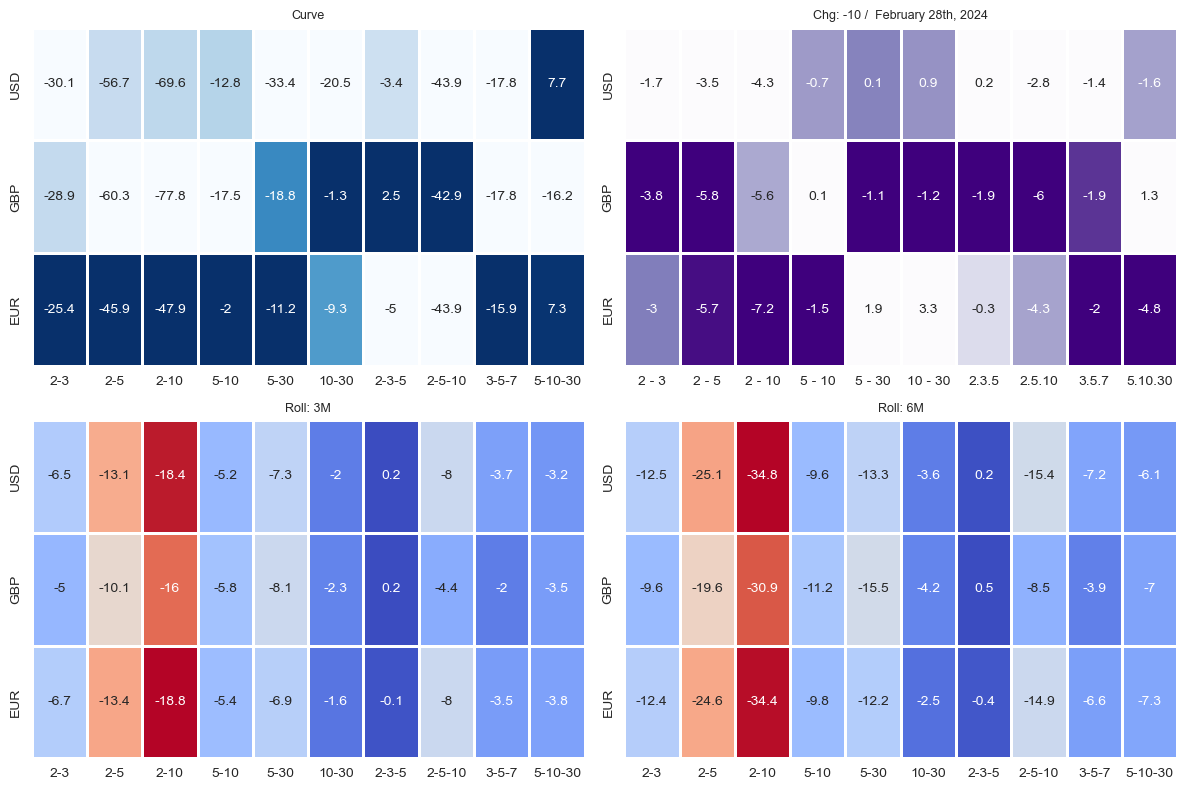

In [157]:
offset = [-10]
ois_flag = 1
z_offset = 0
z_roll = ['3M','6M']

#fig, axs = plt.subplots(2, 2, figsize=(12, 8))
#ax1 = plt.subplot(2, 2, 1)
#ax1.set_title('Rates', fontdict={'fontsize':9})
#df_rates = h1.rates[:-1]
# for i in list(df_rates.index):
#     if any(x == i for x in ['11Y', '13Y', '40Y']):
#         df_rates = df_rates.drop([i])
#
# mask = df_rates.isnull()
# sns.heatmap(df_rates[::-1], cmap='coolwarm', linewidths=1, annot=True, fmt=".5g", cbar=False, mask = mask[::-1], ax=ax1)
#
# ax2 = plt.subplot(2, 2, 2)
# ax2.set_title('Chg: '+str(h1.offset[z_offset])+' /  '+str(h1.dates[z_offset+1]), fontdict={'fontsize':9})
# df_rates_chg = h1.rates_chg[h1.offset[z_offset]][:-1]
# for i in list(df_rates_chg.index):
#     if any(x == i for x in ['11Y', '13Y', '40Y']):
#         df_rates_chg = df_rates_chg.drop([i])
#
# mask = df_rates_chg.isnull()
# sns.heatmap(df_rates_chg[::-1], cmap='Purples_r', linewidths=1, annot=True, fmt=".5g", cbar=False, mask = mask[::-1], ax=ax2)
#
# ax3 = plt.subplot(2, 2, 3)
# ax3.set_title('Fwds', fontdict={'fontsize':9})
# sns.heatmap(h1.curves[::-1], cmap='coolwarm', linewidths=1, annot=True, fmt=".5g", cbar=False, ax=ax3)
#
# ax4 = plt.subplot(2, 2, 4)
# ax4.set_title('Chg: '+str(h1.offset[z_offset])+' /  '+str(h1.dates[z_offset+1]), fontdict={'fontsize':9})
# sns.heatmap(h1.chg[h1.offset[z_offset]][::-1], cmap='Purples_r', linewidths=1, annot=True, fmt=".5g", cbar=False, ax=ax4)



fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)
ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Curve', fontdict={'fontsize':9})
scaled_df = minmax_scale(h1.steep.transpose())
sns.heatmap(scaled_df, cmap='Blues', linewidths=1, annot=h1.steep.transpose(), xticklabels=h1.steep.index, yticklabels=h1.steep.columns, fmt=".5g", cbar=False, ax=ax1)

ax2 = plt.subplot(2, 2, 2)
ax2.set_title('Chg: '+str(h1.offset[z_offset])+' /  '+str(h1.dates[z_offset+1]),  fontdict={'fontsize':9})
df2 = h1.steep_chg[h1.offset[z_offset]].transpose()
scaled_df2 = minmax_scale(df2)
sns.heatmap(scaled_df2, cmap='Purples_r', linewidths=1, annot=df2, xticklabels=df2.columns, yticklabels=df2.index, fmt=".5g", cbar=False, ax=ax2)

ax3 = plt.subplot(2, 2, 3)
ax3.set_title('Roll: '+str(z_roll[0]), fontdict={'fontsize':9} )
sns.heatmap(h1.roll[z_roll[0]].transpose(), cmap='coolwarm_r', linewidths=1, annot=True, fmt=".5g", cbar=False, ax=ax3)

ax4 = plt.subplot(2, 2, 4)
ax4.set_title('Roll: '+str(z_roll[1]), fontdict={'fontsize':9})
sns.heatmap(h1.roll[z_roll[1]].transpose(), cmap='coolwarm_r', linewidths=1, annot=True, fmt=".5g", cbar=False, ax=ax4)

plt.tight_layout()
plt.show()





In [230]:
df_rates = h1.rates[:-1]
for i in list(df_rates.index):
    if any(x == i for x in ['11Y', '13Y', '40Y']):
        df_rates = df_rates.drop([i])

mask1 = df_rates.isnull()

df_rates_chg = h1.rates_chg[h1.offset[z_offset]][:-1]
for i in list(df_rates_chg.index):
    if any(x == i for x in ['11Y', '13Y', '40Y']):
        df_rates_chg = df_rates_chg.drop([i])

mask2 = df_rates_chg.isnull()


print(df_rates, df_rates_chg)

        USD   GBP   EUR   CAD
Tenor                        
2Y    4.506 4.502 2.965 4.166
3Y    4.206 4.215 2.712 3.831
4Y    4.039 4.027 2.576 3.611
5Y    3.942 3.896 2.502 3.486
6Y    3.888  3.81 2.467 3.431
7Y    3.854 3.757 2.452 3.408
8Y    3.832 3.728 2.449   NaN
9Y     3.82 3.717 2.458   NaN
10Y   3.814 3.717 2.473 3.414
12Y   3.814 3.732 2.511 3.448
15Y    3.82 3.755 2.556 3.504
20Y   3.789 3.761 2.535 3.516
25Y   3.701 3.742 2.456 3.424
30Y   3.608 3.706 2.379  3.31
50Y   3.186 3.515 2.145   NaN        USD  GBP  EUR  CAD
Tenor                    
2Y     5.6 -5.2 -3.3  1.8
3Y     4.5 -7.6 -5.0 -0.2
4Y     3.2 -8.6 -6.1 -2.3
5Y     2.2 -9.2 -6.8 -3.5
6Y     1.8 -9.3 -7.2 -3.0
7Y     1.5 -9.3 -7.4 -2.9
8Y     1.3 -9.1 -7.7  NaN
9Y     1.1 -9.0 -7.7  NaN
10Y    1.1 -8.9 -7.9 -2.6
12Y    1.0 -8.8 -7.6 -2.2
15Y    1.1 -8.8 -7.1 -1.9
20Y    1.3 -8.9 -5.9 -1.0
25Y    1.5 -8.9 -4.8 -0.1
30Y    1.6 -8.8 -3.6  0.6
50Y    1.5 -8.0 -1.6  NaN


In [199]:
coolwarm_palette

['#3a4cc0',
 '#3b4dc1',
 '#3c4fc3',
 '#3e51c4',
 '#3f53c6',
 '#4054c7',
 '#4156c9',
 '#4258ca',
 '#435acc',
 '#455bcd',
 '#465dcf',
 '#475fd0',
 '#4860d1',
 '#4962d3',
 '#4b64d4',
 '#4c66d6',
 '#4d67d7',
 '#4e69d8',
 '#506bda',
 '#516cdb',
 '#526edc',
 '#5370dd',
 '#5571de',
 '#5673e0',
 '#5775e1',
 '#5876e2',
 '#5a78e3',
 '#5b79e4',
 '#5c7be5',
 '#5d7de6',
 '#5f7ee7',
 '#6080e8',
 '#6182ea',
 '#6383ea',
 '#6485eb',
 '#6586ec',
 '#6788ed',
 '#6889ee',
 '#698bef',
 '#6b8df0',
 '#6c8ef1',
 '#6d90f1',
 '#6f91f2',
 '#7093f3',
 '#7194f4',
 '#7395f4',
 '#7497f5',
 '#7598f6',
 '#779af6',
 '#789bf7',
 '#7a9df8',
 '#7b9ef8',
 '#7ca0f9',
 '#7ea1f9',
 '#7fa2fa',
 '#80a4fa',
 '#82a5fb',
 '#83a6fb',
 '#85a8fb',
 '#86a9fc',
 '#87aafc',
 '#89acfc',
 '#8aadfd',
 '#8baefd',
 '#8daffd',
 '#8eb1fd',
 '#90b2fe',
 '#91b3fe',
 '#92b4fe',
 '#94b5fe',
 '#95b7fe',
 '#97b8fe',
 '#98b9fe',
 '#99bafe',
 '#9bbbfe',
 '#9cbcfe',
 '#9dbdfe',
 '#9fbefe',
 '#a0bffe',
 '#a2c0fe',
 '#a3c1fe',
 '#a4c2fe',
 '#a6c3fd',
 '#a

In [245]:
m_coolwarm_rgb = (255 * cm.coolwarm(range(256))).astype('int')
coolwarm_palette = [RGB(*tuple(rgb)).to_hex() for rgb in m_coolwarm_rgb]
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

df1 = pd.DataFrame(df_rates.stack(), columns=['rate']).reset_index()
df2 = pd.DataFrame(df_rates_chg.stack(), columns=['chg']).reset_index()
df1.columns = ['Tenor','Curve','Rate']
df1['Chg'] = df2['chg']
n_crv = df_rates.shape[1]
s1_source = ColumnDataSource(df1)

df3 = pd.DataFrame(h1.curves.stack(), columns=['fwds']).reset_index()
df4 = pd.DataFrame(h1.chg[h1.offset[z_offset]].stack(), columns=['chg']).reset_index()
df3.columns = ['Fwds','Curve','Rate']
df3['Chg'] = df4['chg']
s2_source = ColumnDataSource(df3)

f1 = df1['Chg'].tolist()+df3['Chg'].tolist()
mapper_rates = LinearColorMapper(palette=coolwarm_palette, low=1, high=6.5)
mapper_chg = LinearColorMapper(palette=coolwarm_palette, low=min(f1), high=max(f1))


s1 = figure(title="Rate",x_range=df_rates.columns.tolist(), y_range=df_rates.index.tolist(), x_axis_location="below", width=100*n_crv, height=400,toolbar_location=None)
s1.grid.grid_line_color = None
s1.axis.axis_line_color = None
s1.axis.major_tick_line_color = None
s1.axis.major_label_text_font_size = "12px"
s1.yaxis.axis_label = 'Tenor'

s1.rect(x="Curve", y="Tenor", width=1, height=1, source=s1_source, fill_color={'field': 'Rate', 'transform': mapper_rates}, line_color=None)
#s1.multi_line(xs=[[0,1], [1,2], [2,3], [3,4]], ys=[[0,0], [0,0], [0,0], [0,0]], color=['green', 'yellow', 'red', 'blue'], line_width=4)
labels = LabelSet(x='Curve',y='Tenor', text='Rate', source=s1_source, level='glyph', text_align='center', y_offset=-7, text_color = 'black', text_font_size='9pt')
s1.add_layout(labels)


s2 = figure(title='Chg: '+str(h1.dates[z_offset+1]),x_range=df_rates.columns.tolist(), y_range=df_rates.index.tolist(), x_axis_location="below", y_axis_location="right", width=100*n_crv-75, height=400,toolbar_location=None)
s2.grid.grid_line_color = None
s2.axis.axis_line_color = None
s2.axis.major_tick_line_color = None
s2.axis.major_label_text_font_size = "12px"
s2.yaxis.visible = False

s2.rect(x="Curve", y="Tenor", width=1, height=1, source=s1_source, fill_color={'field': 'Chg', 'transform': mapper_chg}, line_color=None)
labels_chg = LabelSet(x='Curve',y='Tenor', text='Chg', source=s1_source, level='glyph', text_align='center', y_offset=-7, text_color = 'black', text_font_size='9pt')
s2.add_layout(labels_chg)

s3 = figure(title="Fwds",x_range=df_rates.columns.tolist(), y_range=df3.Fwds.unique().tolist(), x_axis_location="below", width=100*n_crv-50, height=400,toolbar_location=None)
s3.grid.grid_line_color = None
s3.axis.axis_line_color = None
s3.axis.major_tick_line_color = None
s3.axis.major_label_text_font_size = "12px"
#s3.yaxis.axis_label = 'Fwd'

s3.rect(x="Curve", y="Fwds", width=1, height=1, source=s2_source, fill_color={'field': 'Rate', 'transform': mapper_rates}, line_color=None)
labels2 = LabelSet(x='Curve',y='Fwds', text='Rate', source=s2_source, level='glyph', text_align='center', y_offset=-7, text_color = 'black', text_font_size='9pt')
s3.add_layout(labels2)

s4 = figure(title="Chg",x_range=df_rates.columns.tolist(), y_range=df3.Fwds.unique().tolist(), x_axis_location="below", y_axis_location="right", width=100*n_crv-75, height=400,toolbar_location=None)
s4.grid.grid_line_color = None
s4.axis.axis_line_color = None
s4.axis.major_tick_line_color = None
s4.axis.major_label_text_font_size = "12px"
s4.yaxis.visible = False

s4.rect(x="Curve", y="Fwds", width=1, height=1, source=s2_source, fill_color={'field': 'Chg', 'transform': mapper_chg}, line_color=None)
labels_chg2 = LabelSet(x='Curve',y='Fwds', text='Chg', source=s2_source, level='glyph', text_align='center', y_offset=-7, text_color = 'black', text_font_size='9pt')
s4.add_layout(labels_chg2)


df5 = pd.DataFrame(h1.steep[::-1].stack(), columns=['spread']).reset_index()
df6 = pd.DataFrame(pd.DataFrame(h1.steep_chg[h1.offset[0]])[::-1].stack(), columns=['chg']).reset_index()
df5.columns = ['Steep','Curve','Spread']
df5['Chg'] = np.round(df6['chg'],1)
s3_source = ColumnDataSource(df5)

df7 = pd.DataFrame(h1.roll[z_roll[0]][::-1].stack(), columns=['roll_1']).reset_index()
df8 = pd.DataFrame(h1.roll[z_roll[1]][::-1].stack(), columns=['roll_2']).reset_index()
df7.columns = ['Steep','Curve','Roll_1']
df7['Roll_1'] = np.round(df7['Roll_1'],1)
df7['Roll_2'] = np.round(df8['roll_2'],1)
s4_source = ColumnDataSource(df7)

f2 = df5['Chg'].tolist()
f3 = df7['Roll_1'].tolist()+df7['Roll_2'].tolist()
mapper_curve = LinearColorMapper(palette=coolwarm_palette, low=-50, high=50)
mapper_curve_chg = LinearColorMapper(palette=coolwarm_palette[::-1], low=min(f2), high=max(f2))
mapper_roll = LinearColorMapper(palette=coolwarm_palette[::-1], low=min(f3), high=max(f3))


s5 = figure(title="Curve",x_range=df_rates.columns.tolist(), y_range=df5.Steep.unique().tolist(), x_axis_location="below", width=100*n_crv, height=400,toolbar_location=None)
s5.grid.grid_line_color = None
s5.axis.axis_line_color = None
s5.axis.major_tick_line_color = None
s5.axis.major_label_text_font_size = "12px"
s5.yaxis.axis_label = 'Curve'

s5.rect(x="Curve", y="Steep", width=1, height=1, source=s3_source, fill_color={'field': 'Spread', 'transform': mapper_curve}, line_color=None)
labels3 = LabelSet(x='Curve',y='Steep', text='Spread', source=s3_source, level='glyph', text_align='center', y_offset=-7, text_color = 'black', text_font_size='9pt')
s5.add_layout(labels3)

s6 = figure(title="Chg",x_range=df_rates.columns.tolist(), y_range=df5.Steep.unique().tolist(), x_axis_location="below", y_axis_location="right", width=100*n_crv-75, height=400,toolbar_location=None)
s6.grid.grid_line_color = None
s6.axis.axis_line_color = None
s6.axis.major_tick_line_color = None
s6.axis.major_label_text_font_size = "12px"
s6.yaxis.visible = False

s6.rect(x="Curve", y="Steep", width=1, height=1, source=s3_source, fill_color={'field': 'Chg', 'transform': mapper_curve_chg}, line_color=None)
labels_chg3 = LabelSet(x='Curve',y='Steep', text='Chg', source=s3_source, level='glyph', text_align='center', y_offset=-7, text_color = 'black', text_font_size='9pt')
s6.add_layout(labels_chg3)


s7 = figure(title='Roll: '+z_roll[0],x_range=df_rates.columns.tolist(), y_range=df5.Steep.unique().tolist(), x_axis_location="below", width=100*n_crv-50, height=400,toolbar_location=None)
s7.grid.grid_line_color = None
s7.axis.axis_line_color = None
s7.axis.major_tick_line_color = None
s7.axis.major_label_text_font_size = "12px"
#s7.yaxis.visible = False

s7.rect(x="Curve", y="Steep", width=1, height=1, source=s4_source, fill_color={'field': 'Roll_1', 'transform': mapper_roll}, line_color=None)
labels_roll1 = LabelSet(x='Curve',y='Steep', text='Roll_1', source=s4_source, level='glyph', text_align='center', y_offset=-7, text_color = 'black', text_font_size='9pt')
s7.add_layout(labels_roll1)

s8 = figure(title='Roll: '+z_roll[1],x_range=df_rates.columns.tolist(), y_range=df5.Steep.unique().tolist(), x_axis_location="below", y_axis_location="right", width=100*n_crv-75, height=400,toolbar_location=None)
s8.grid.grid_line_color = None
s8.axis.axis_line_color = None
s8.axis.major_tick_line_color = None
s8.axis.major_label_text_font_size = "12px"
s8.yaxis.visible = False

s8.rect(x="Curve", y="Steep", width=1, height=1, source=s4_source, fill_color={'field': 'Roll_2', 'transform': mapper_roll}, line_color=None)
labels_roll2 = LabelSet(x='Curve',y='Steep', text='Roll_2', source=s4_source, level='glyph', text_align='center', y_offset=-7, text_color = 'black', text_font_size='9pt')
s8.add_layout(labels_roll2)



p = layout(children=[[s1, s2, s3, s4], [s5, s6, s7, s8]])

#grid = gridplot([[s1, s2, s3, s4]], width=300, height=500)
show(p)



In [252]:
h1.roll[1]

,USD,GBP
2-3,-21.799999999999997,-17.0
2-5,-43.5,-35.8
2-10,-59.699999999999996,-55.99999999999999
5-10,-16.3,-20.3
5-30,-21.5,-27.099999999999998
10-30,-5.199999999999999,-6.800000000000001
2-3-5,0.0,1.9000000000000001
2-5-10,-27.300000000000004,-15.5
3-5-7,-12.500000000000002,-7.4
5-10-30,-11.0,-13.5


In [173]:

pd.DataFrame(h1.steep[::-1].stack(), columns=['spread']).reset_index()

pd.DataFrame(pd.DataFrame(h1.steep_chg[-10])[::-1].stack(), columns=['chg']).reset_index()




,Curve,level_1,chg
0,5.10.30,USD,-1.6000000000000005
1,5.10.30,GBP,1.3000000000000007
2,5.10.30,EUR,-4.8
3,3.5.7,USD,-1.4000000000000021
4,3.5.7,GBP,-1.9000000000000004
5,3.5.7,EUR,-2.0
6,2.5.10,USD,-2.799999999999997
7,2.5.10,GBP,-6.0
8,2.5.10,EUR,-4.299999999999997
9,2.3.5,USD,0.20000000000000018


In [17]:
from bokeh.sampledata.unemployment1948 import data

data['Year'] = data['Year'].astype(str)
data = data.set_index('Year')
data.drop('Annual', axis=1, inplace=True)
data.columns.name = 'Month'

years = list(data.index)
months = list(data.columns)

# reshape to 1D array or rates with a month and year for each row.
df = pd.DataFrame(data.stack(), columns=['rate']).reset_index()

In [19]:
data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1948,4.0,4.7,4.5,4.0,3.4,3.9,3.9,3.6,3.4,2.9,3.3,3.6
1949,5.0,5.8,5.6,5.4,5.7,6.4,7.0,6.3,5.9,6.1,5.7,6.0
1950,7.6,7.9,7.1,6.0,5.3,5.6,5.3,4.1,4.0,3.3,3.8,3.9
1951,4.4,4.2,3.8,3.2,2.9,3.4,3.3,2.9,3.0,2.8,3.2,2.9
1952,3.7,3.8,3.3,3.0,2.9,3.2,3.3,3.1,2.7,2.4,2.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,8.8,8.7,8.4,7.7,7.9,8.4,8.6,8.2,7.6,7.5,7.4,7.6
2013,8.5,8.1,7.6,7.1,7.3,7.8,7.7,7.3,7.0,7.0,6.6,6.5
2014,7.0,7.0,6.8,5.9,6.1,6.3,6.5,6.3,5.7,5.5,5.5,5.4


In [20]:
df

,Year,Month,rate
0,1948,Jan,4.0
1,1948,Feb,4.7
2,1948,Mar,4.5
3,1948,Apr,4.0
4,1948,May,3.4
...,...,...,...
823,2016,Aug,5.0
824,2016,Sep,4.8
825,2016,Oct,4.7
826,2016,Nov,4.4


In [23]:
df_rates

,USD,GBP
Tenor,,
2Y,4.503,4.501
3Y,4.198,4.208
4Y,4.029,4.016
5Y,3.93,3.887
6Y,3.875,3.799
7Y,3.84,3.746
8Y,3.818,3.717
9Y,3.806,3.706
10Y,3.798,3.706


In [24]:
pd.DataFrame(df_rates.stack(), columns=['rate']).reset_index()

,Tenor,level_1,rate
0,2Y,USD,4.503
1,2Y,GBP,4.501
2,3Y,USD,4.198
3,3Y,GBP,4.208
4,4Y,USD,4.029
5,4Y,GBP,4.016
6,5Y,USD,3.93
7,5Y,GBP,3.887
8,6Y,USD,3.875
9,6Y,GBP,3.799
